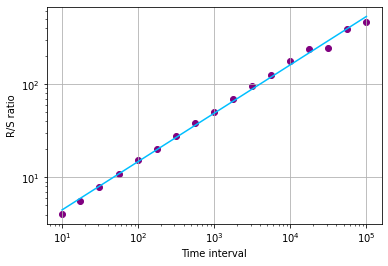

H=0.5183, c=1.3587


In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from hurst import compute_Hc

# Use random_walk() function or generate a random walk series manually:
# series = random_walk(99999, cumprod=True)
np.random.seed(42)
random_changes = 1. + np.random.randn(99999) / 1000.
series = np.cumprod(random_changes)  # create a random walk from random changes

# Evaluate Hurst equation
H, c, data = compute_Hc(series, kind='price', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [2]:
from jellyfish.candles_loader import get_sample_frame
df = get_sample_frame()
H, c, date = compute_Hc(df.Close.to_numpy(), simplified=True)
'H={:.4f}, c={:.4f}'.format(H,c)

'H=0.4743, c=1.3335'

In [5]:
from datetime import datetime, timedelta

from backtesting import Backtest

from jellyfish import utils, indicator
from jellyfish.candles_loader import load_candles_history
from jellyfish.stretegy import DummyStrategy


class DummyStrategyWithIndicators(DummyStrategy):
    def init(self):
        self.I(indicator.zigzag, self.data.Close.data, 2e-2)
        self.I(indicator.hurst, self.data.Close.data, 100)


end_dt = datetime(year=2022, month=2, day=3)
start_dt = end_dt - timedelta(days=30)
frame = load_candles_history(utils.load_binance_client(), 'XRPUSDT', start_dt, end_dt, '1h')

backtest = Backtest(frame.reset_index(), DummyStrategyWithIndicators)
backtest.run()
utils.plot_ohlc_from_backtest(backtest)

100%|██████████| 1/1 [00:00<00:00, 274.68it/s]
/tmp/ipykernel_524140/941966956.py:20: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(frame.reset_index(), DummyStrategyWithIndicators)


0.6452547052272329
0.624859680454347
0.6026022043653011
0.6314348512943583
0.6549631112381132
0.6432262644629371
0.6465672404874564
0.6293959509069725
0.6227453970110217
0.6336626166821593
0.6444586662832315
0.634624765247402
0.5966414012727068
0.6086943558727571
0.6511974705881385
0.6518892500654655
0.655361016685959
0.6073509005422252
0.5915031945111066
0.6108126576069277
0.6240158044527363
0.6329364753592647
0.5978490744489559
0.5966239267771054
0.6333429851312659
0.6027676801703923
0.6182925148901812
0.5779910783010088
0.5664023463351954
0.5731508359323744
0.5676426979050663
0.578779006470733
0.5360274545936139
0.5712001375891379
0.5538759695783854
0.5258931733046673
0.5372260435463952
0.5152551357786898
0.5447651787627668
0.545995339131075
0.526870392630913
0.5170123030571102
0.49644895770443204
0.4021370018196721
0.3492251664775547
0.3163170293815687
0.3105268665917147
0.298716475640364
0.3152310115766256
0.31141616082901113
0.33970615063801224
0.3485410631627318
0.34215791872849